<a href="https://colab.research.google.com/github/KeerthiSegu/DataScience-Assignments_Repository/blob/main/Cluster_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages** 





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# PreProcessing Steps

**Reading the Dataset**

In [ ]:
data=pd.read_csv("/content/bankmarketing.csv")

In [ ]:
df=data

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Summary of DataSet**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26180 entries, 0 to 26179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26180 non-null  int64  
 1   job             26180 non-null  object 
 2   marital         26180 non-null  object 
 3   education       26180 non-null  object 
 4   default         26180 non-null  object 
 5   housing         26180 non-null  object 
 6   loan            26180 non-null  object 
 7   contact         26180 non-null  object 
 8   month           26180 non-null  object 
 9   day_of_week     26180 non-null  object 
 10  duration        26180 non-null  int64  
 11  campaign        26180 non-null  int64  
 12  pdays           26180 non-null  int64  
 13  previous        26180 non-null  int64  
 14  poutcome        26180 non-null  object 
 15  emp.var.rate    26180 non-null  float64
 16  cons.price.idx  26180 non-null  float64
 17  cons.conf.idx   26179 non-null 

**Shape of Dataset**

In [ ]:
df.shape

(26180, 21)

1. The dataset has 8780 rows and 21 columns.

**Name of columns**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Dataypes of columns**

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Preview of Dataset**

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26179.000000,26179.000000,26179.000000
mean,40.162299,252.843697,2.829412,998.125936,0.017571,1.185966,93.876674,-39.314344,4.861582,5214.406356
std,9.198158,261.729817,3.212457,29.476937,0.131678,0.410485,0.641521,3.017692,0.214234,17.538745
min,18.000000,0.000000,1.000000,0.000000,0.000000,-0.100000,9.000000,-42.700000,4.076000,5191.000000
25%,33.000000,99.000000,1.000000,999.000000,0.000000,1.100000,93.444000,-42.700000,4.857000,5191.000000
50%,39.000000,171.000000,2.000000,999.000000,0.000000,1.400000,93.918000,-41.800000,4.959000,5228.100000
75%,47.000000,307.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.963000,5228.100000
max,61.000000,4918.000000,56.000000,999.000000,2.000000,1.400000,94.465000,-36.100000,5.045000,5228.100000


**Checking Null values**

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     1
euribor3m         1
nr.employed       1
y                 1
dtype: int64

**Filling Null Values**

In [ ]:
df.dropna(axis=0,how='any',inplace=True)

Again viewing the summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26179 entries, 0 to 26178
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26179 non-null  int64  
 1   job             26179 non-null  object 
 2   marital         26179 non-null  object 
 3   education       26179 non-null  object 
 4   default         26179 non-null  object 
 5   housing         26179 non-null  object 
 6   loan            26179 non-null  object 
 7   contact         26179 non-null  object 
 8   month           26179 non-null  object 
 9   day_of_week     26179 non-null  object 
 10  duration        26179 non-null  int64  
 11  campaign        26179 non-null  int64  
 12  pdays           26179 non-null  int64  
 13  previous        26179 non-null  int64  
 14  poutcome        26179 non-null  object 
 15  emp.var.rate    26179 non-null  float64
 16  cons.price.idx  26179 non-null  float64
 17  cons.conf.idx   26179 non-null 

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We can see that all the null values are removed from the dataset.


 **Memory Optimization**

In [ ]:
old_memory=df.memory_usage().sum()
print(old_memory)

4607504


In [ ]:
for i in df.describe().columns:
    if 'int' in str(df[i].dtype):
        print(i,df[i].dtype)
        if df[i].min()>np.iinfo(np.int8).min and df[i].max()<np.iinfo(np.int8).max:
            df[i]=df[i].astype(np.int8)
        elif df[i].min()>np.iinfo(np.int16).min and df[i].max()<np.iinfo(np.int16).max:
            df[i]=df[i].astype(np.int16)
        elif df[i].min()>np.iinfo(np.int32).min and df[i].max()<np.iinfo(np.int32).max:
            df[i]=df[i].astype(np.int32)
        elif df[i].min()>np.iinfo(np.int64).min and df[i].max()<np.iinfo(np.int64).max:
            df[i]=df[i].astype(np.int64)

age int64
duration int64
campaign int64
pdays int64
previous int64


In [ ]:
new_memory=df.memory_usage().sum()
print(new_memory)

3743597


**Lift Calculation**

In [ ]:
lift = ((old_memory-new_memory)/old_memory)*100
print(lift)

18.75


**Outlier Treatment**

In [ ]:
def outlier_treatment(x):
    for i in x.describe().columns:
        qrt1=np.quantile(x[i],0.25)
        qrt2=np.quantile(x[i],0.50)
        qrt3=np.quantile(x[i],0.75)
        iqrt=qrt3-qrt1
        utv=qrt3+1.5*(iqrt)
        ltv=qrt1-1.5*(iqrt)
        outlier_treated_values=[]
        for i in x[i]:
            if i<ltv or i>utv:
                outlier_treated_values.append(x[i].median())
            else:
                outlier_treated_values.append(i)
                return x
        x[i]=outlier_treated_values

In [ ]:
df1=outlier_treatment(df)

In [ ]:
df.drop(['y'],axis=1,inplace=True)

**Label Encoding**

In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
26174,31,entrepreneur,married,basic.9y,no,no,no,cellular,nov,wed,558,3,999,0,nonexistent,-0.1,93.2,-42.0,4.120,5195.8
26175,36,blue-collar,married,basic.6y,no,yes,no,cellular,nov,wed,800,6,999,0,nonexistent,-0.1,93.2,-42.0,4.120,5195.8
26176,29,blue-collar,married,high.school,no,no,no,cellular,nov,wed,854,2,999,0,nonexistent,-0.1,93.2,-42.0,4.120,5195.8
26177,53,blue-collar,divorced,basic.6y,no,yes,no,cellular,nov,wed,635,6,999,0,nonexistent,-0.1,93.2,-42.0,4.120,5195.8
26178,29,blue-collar,married,high.school,no,yes,no,telephone,nov,thu,72,3,999,0,nonexistent,-0.1,93.2,-42.0,4.076,5195.8


In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(df['job'])
LE.transform(df['job'])

LabelEncoder()

array([3, 7, 7, ..., 1, 1, 1])

In [ ]:
df['job']=LE.transform(df['job'])

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['marital'])
LE.transform(data['marital'])

LabelEncoder()

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
df['marital']=LE.transform(df['marital'])

In [ ]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['housing'])
LE.transform(data['housing'])

LabelEncoder()

array([0, 0, 2, ..., 0, 2, 2])

In [ ]:
df['housing']=LE.transform(df['housing'])

In [ ]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['default'])
LE.transform(data['default'])

LabelEncoder()

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
df['default']=LE.transform(df['default'])

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['education'])
LE.transform(data['education'])

LabelEncoder()

array([0, 3, 3, ..., 3, 1, 3])

In [ ]:
df['education']=LE.transform(df['education'])

In [ ]:
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['loan'])
LE.transform(data['loan'])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df['loan']=LE.transform(df['loan'])

In [ ]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['contact'])
LE.transform(data['contact'])

LabelEncoder()

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
df['contact']=LE.transform(df['contact'])

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
LE=LabelEncoder()
LE.fit(data['poutcome'])
LE.transform(data['poutcome'])

LabelEncoder()

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df['poutcome']=LE.transform(df['poutcome'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def standard_scaler(x):
    df_numerical=x[x.describe().columns]
    mn=MinMaxScaler()
    mn.fit(df_numerical)
    mn.transform(df_numerical)
    df_Standard_Scale=pd.DataFrame(mn.transform(df_numerical),columns=df_numerical.columns)
    return df_Standard_Scale

In [ ]:
standard_scaler(df)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.883721,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.053070,0.000000,1.0,0.0,0.5,0.8,0.627668,0.954545,0.805986,0.00000
1,0.906977,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.030297,0.000000,1.0,0.0,0.5,0.8,0.627668,0.954545,0.805986,0.00000
2,0.441860,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.045954,0.000000,1.0,0.0,0.5,0.8,0.627668,0.954545,0.805986,0.00000
3,0.511628,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.030704,0.000000,1.0,0.0,0.5,0.8,0.627668,0.954545,0.805986,0.00000
4,0.883721,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.062424,0.000000,1.0,0.0,0.5,0.8,0.627668,0.954545,0.805986,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26174,0.302326,0.181818,0.333333,0.285714,0.0,0.0,0.0,0.0,0.113461,0.036364,1.0,0.0,0.5,0.0,0.000000,0.106061,0.045408,0.12938
26175,0.418605,0.090909,0.333333,0.142857,0.0,1.0,0.0,0.0,0.162668,0.090909,1.0,0.0,0.5,0.0,0.000000,0.106061,0.045408,0.12938
26176,0.255814,0.090909,0.333333,0.428571,0.0,0.0,0.0,0.0,0.173648,0.018182,1.0,0.0,0.5,0.0,0.000000,0.106061,0.045408,0.12938
26177,0.813953,0.090909,0.000000,0.142857,0.0,1.0,0.0,0.0,0.129118,0.090909,1.0,0.0,0.5,0.0,0.000000,0.106061,0.045408,0.12938


# **Exploratory Data Analysis**

**Age Analysis**

<Axes: xlabel='age'>

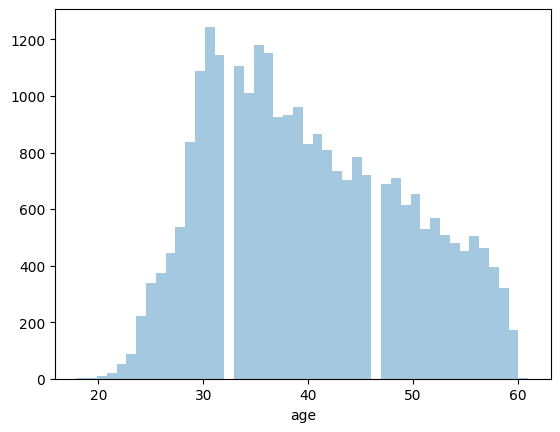

In [ ]:
sns.distplot(df['age'], kde=False)

In [ ]:
((df[df['age']<50].shape[0])/data.shape[0])*100

80.70208946101837

In [ ]:
((df[df['age']>50].shape[0])/data.shape[0])*100

16.799724970396117

1. We can 81% of the people who has taken the loan are of age below 50 years.

2. Maxmimum number of people who has taken the are between the age group of 35 to 40 years.

3. only 15% of people has taken the loan whose age lies between 50 to 60 years. After 60 years no one has taken the loan.

**Job analysis**

<Axes: xlabel='job'>

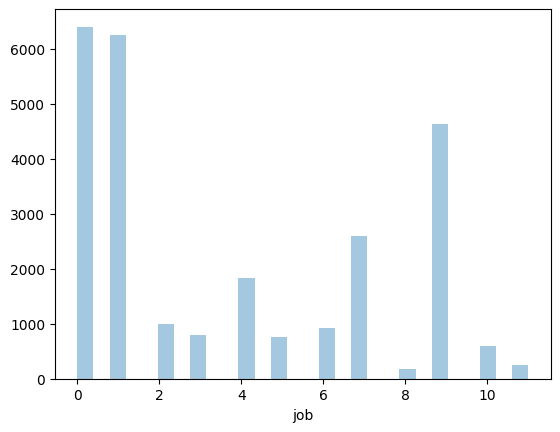

In [ ]:
sns.distplot(data['job'],kde=False)

In [ ]:
df['job'].value_counts()

0     6399
1     6257
9     4625
7     2590
4     1823
2      986
6      915
3      799
5      764
10     590
11     248
8      183
Name: job, dtype: int64

1. Maximum number of people whose has taken the loan are "Blue-Collar" job holders.

2. Only 77 technicians has taken the loan.

3. Second Maximum people whos has taken the loan "Admin." Job holders.



**Default analysis**

<Axes: xlabel='default'>

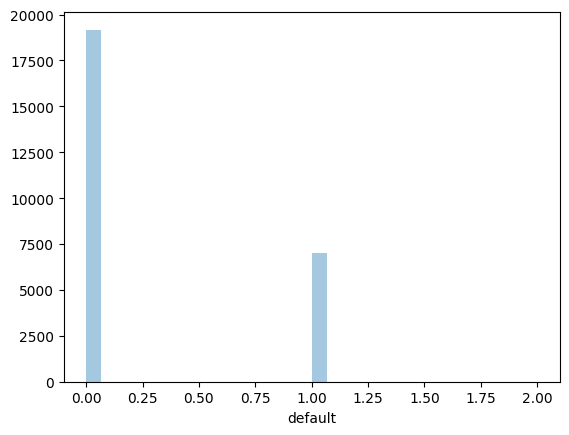

In [ ]:
sns.distplot(data['default'],kde=False)

In [ ]:
((df[df['default']==1].shape[0])/df.shape[0])*100

26.7428091218152

1. Maximum people didn't pay their credit bill till to date.

2. Only 31.1% people has paid their credit card bills.

<Axes: xlabel='marital'>

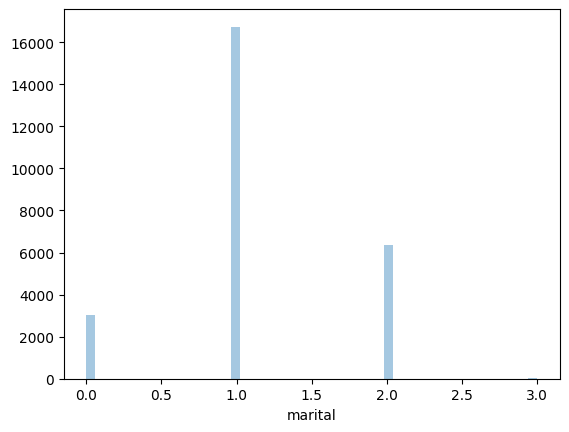

In [ ]:
sns.distplot(df['marital'],kde=False)

In [ ]:
((df[df['marital']<1].shape[0])/df.shape[0])*100

11.532144084953588

In [ ]:
((df[df['marital']==1].shape[0])/df.shape[0])*100

63.93674319110738

1. Maximum people whose has taken the loan are married people, i.e., 66.7%.

2. 11.4% divorced people has taken the loan.

3. 21.8% singles has taken the loan

<Axes: xlabel='housing'>

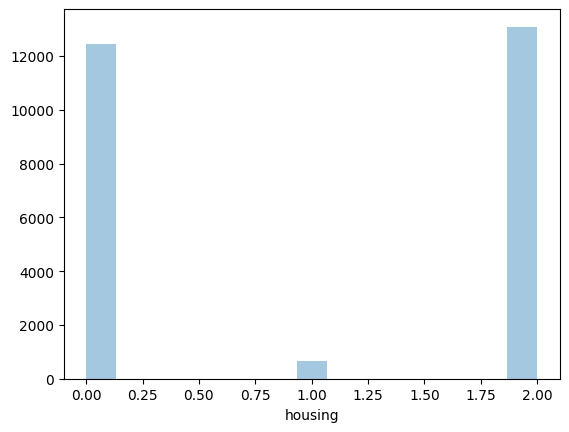

In [ ]:
sns.distplot(df['housing'],kde=False)

In [ ]:
((df[df['housing']>1].shape[0])/df.shape[0])*100

49.9866305053669

In [ ]:
((df[df['housing']<1].shape[0])/df.shape[0])*100

47.55720233775163

1. 45.6% people has taken "House Loan".

2. 51.5% people has not taken the "House Loan".

<Axes: xlabel='loan'>

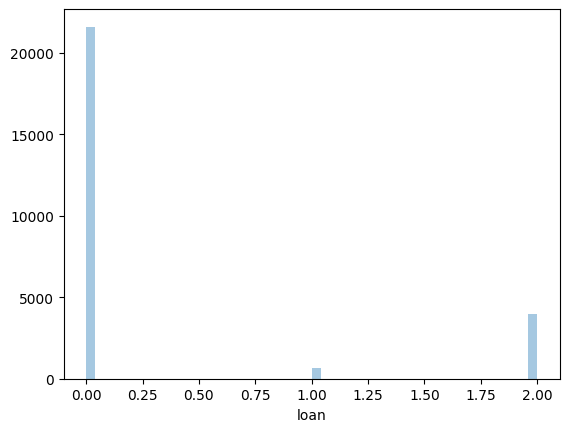

In [ ]:
sns.distplot(df['loan'],kde=False)

In [ ]:
((df[df['loan']<1].shape[0])/df.shape[0])*100

82.47450246380687

In [ ]:
((df[df['loan']>1].shape[0])/df.shape[0])*100

15.069330379311662

1. Maximum number of people do not have the "Personal Loan",i.e, 82.6%

2. 14.5% people has taken "Personal Loans".


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,may,mon,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,may,mon,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,may,mon,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,may,mon,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,may,mon,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


<Axes: xlabel='poutcome'>

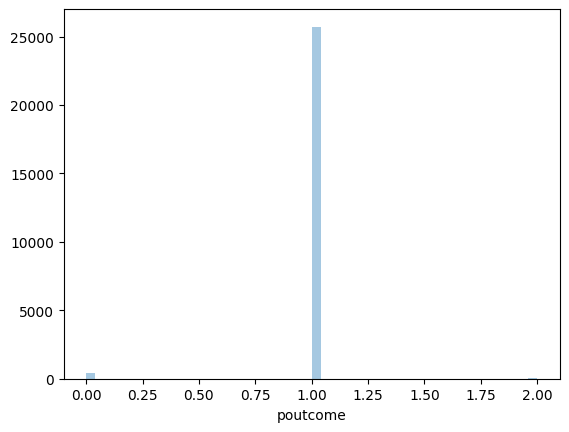

In [ ]:
sns.distplot(df['poutcome'],kde=False)

In [ ]:
((df[df['poutcome']>.95].shape[0])/df.shape[0])*100

98.33454295427633

1. From the above result we can say that previous outcome of marketing campaign is a "Non-existent".

**Duration vs Age**

Text(0.5, 0, 'age')

Text(0, 0.5, 'duration')

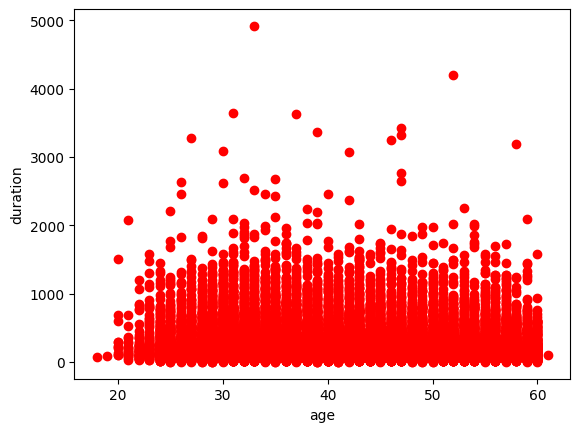

In [ ]:
plt.scatter(df['age'],df['duration'],color='r')
plt.xlabel("age")
plt.ylabel("duration")

In [ ]:
((df[df['duration']<1000].shape[0])/df.shape[0])*100

97.61259024408876

1. we can see there are few outliers.i.e., whose duration lies between 1000 to 5000 i.e., 2.3%

2. Maximum contact duration is less than 1000 i.e.,97.6%

3. Every age group people has been contacted.


Campaign Vs Duration

Text(0.5, 0, 'campaign')

Text(0, 0.5, 'duration')

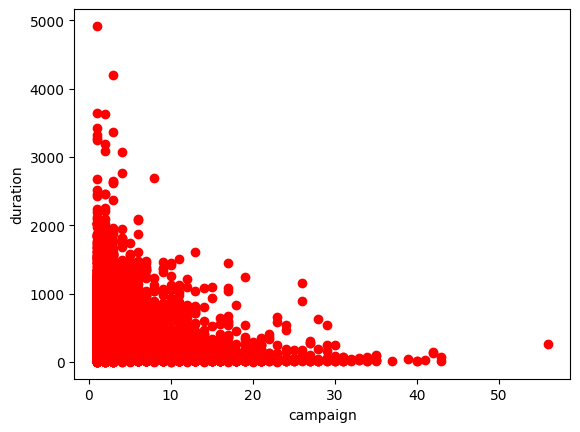

In [ ]:
plt.scatter(df['campaign'],df['duration'],color='r')
plt.xlabel("campaign")
plt.ylabel("duration")


In [ ]:
df['campaign'].max()

56

In [ ]:
((df[df['campaign']>14].shape[0])/df.shape[0])*100

1.5126628213453532

1. 39.77% of people has contacted once during a campaign with duration of less than 1000 sec

2. 98.1% of the people has been contacted less than 10 times during this campaign period.

3. Only 1.5% of people called more than 14 times with in the campaign period.

4. we can see maximum number of contacts made to a person is 56.

Pdays Vs Campaign

Text(0.5, 0, 'pdays')

Text(0, 0.5, 'campaign')

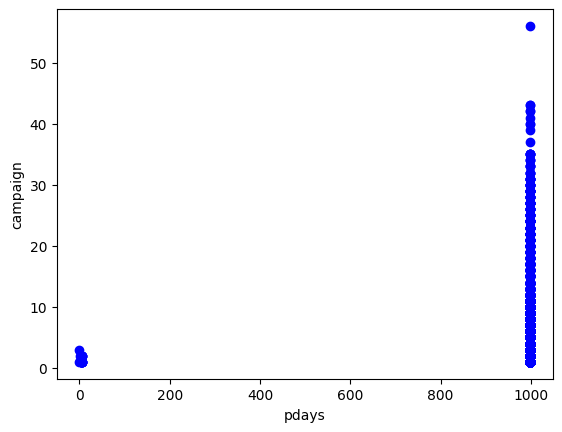

In [ ]:
plt.scatter(df['pdays'],df['campaign'],color='b')
plt.xlabel("pdays")
plt.ylabel("campaign")


In [ ]:
((df[df['pdays']>998].shape[0])/df.shape[0])*100

99.91214332098247

1. Here 999 means Client was not previously Contacted.

2. As we can see only 0.08% people has been contacted previously.

3. From above we can see that 99.9% people has not been contacted previously.

Emp.var.rate Vs nr.employed

Text(0.5, 0, 'cons.price.index')

Text(0, 0.5, 'nr.employed')

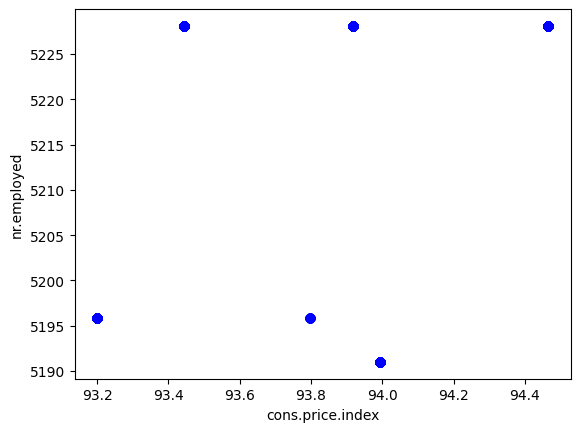

In [ ]:
plt.scatter(df['cons.price.idx'],df['nr.employed'],color='b')
plt.xlabel("cons.price.index")
plt.ylabel("nr.employed")

In [ ]:
df['nr.employed'].max()

5228.1

1. From above we can see that there are outliers.

2. Maximum number of  employees in quartly period is 5228.1.

3. as number of employees increases consumer price index also increases.



In [ ]:
df.drop['month','day_of_week'],axis=1,inplace=True)
df.head()


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
df.drop(['marital','education','duration','previous','poutcome'],axis=1,inplace=True)

## Model Building

## KMeans

K elbow method to find number of clusters.

In [ ]:
from sklearn.cluster import KMeans
km=KMeans()
centroid_distance=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(df)
  print(f"cluster {i} data")
  print(km.labels_)
  centroid_distance.append(km.inertia_)
  print(" ")


KMeans(n_clusters=1)

cluster 1 data
[0 0 0 ... 0 0 0]
 


KMeans(n_clusters=2)

cluster 2 data
[0 0 0 ... 0 0 0]
 


KMeans(n_clusters=3)

cluster 3 data
[2 2 2 ... 2 2 2]
 


KMeans(n_clusters=4)

cluster 4 data
[2 2 2 ... 2 2 2]
 


KMeans(n_clusters=5)

cluster 5 data
[0 0 3 ... 3 0 3]
 


KMeans(n_clusters=6)

cluster 6 data
[0 0 3 ... 3 0 3]
 


KMeans(n_clusters=7)

cluster 7 data
[0 0 3 ... 5 0 5]
 


KMeans()

cluster 8 data
[6 6 5 ... 5 6 5]
 


KMeans(n_clusters=9)

cluster 9 data
[6 6 2 ... 8 6 8]
 


KMeans(n_clusters=10)

cluster 10 data
[4 4 2 ... 7 4 7]
 


Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Variance')

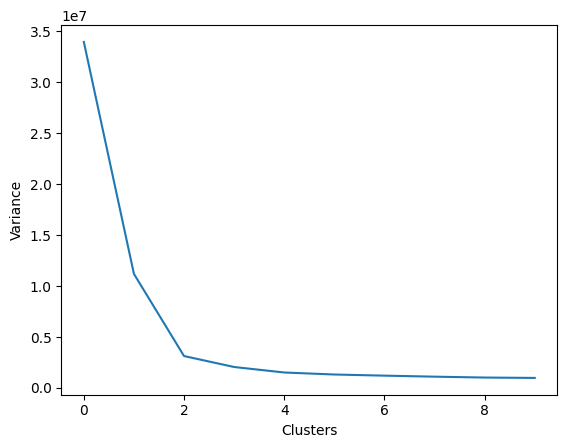

In [ ]:
plt.plot(centroid_distance)
plt.xlabel("Clusters")
plt.ylabel("Variance")

From the above plot, I am taking clusters=2 as we can that from 4 onwards the line is flat.

In [ ]:
from sklearn.cluster import KMeans
km=KMeans()
km=KMeans(n_clusters=2)
km.fit(df)
centroid_distance.append(km.inertia_)
print(" ")
df['clusters']=km.labels_
df.head()

KMeans(n_clusters=2)

,age,job,default,housing,loan,contact,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,clusters
0,56,3,0,0,0,1,1,999,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,0,0,1,1,999,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,0,2,0,1,1,999,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,0,0,1,1,999,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,0,0,2,1,1,999,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
km.inertia_

11190804.300511196

This model has high inertia.

# Grouping based on clusters

In [ ]:
df.groupby('clusters').sum()

,age,job,default,housing,loan,contact,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
clusters,,,,,,,,,,,,,
0,1050482.0,96988,7003,26783,8525,13571,74032.0,26129844.0,31051.0,2455538.728,-1028244.2,127175.868,136388440.6
1,918.0,87,4,32,8,3,35.0,94.0,-2.3,2143.600,-966.0,95.479,119503.4


In [ ]:
data.groupby('clusters').describe().T

clusters                      0            1
age         count  26156.000000    23.000000
            mean      40.162181    39.913043
            std        9.198763     8.686003
            min       18.000000    31.000000
            25%       33.000000    33.000000
...                         ...          ...
nr.employed min     5191.000000  5195.800000
            25%     5191.000000  5195.800000
            50%     5228.100000  5195.800000
            75%     5228.100000  5195.800000
            max     5228.100000  5195.800000

[104 rows x 2 columns]

# Plotting the clusters

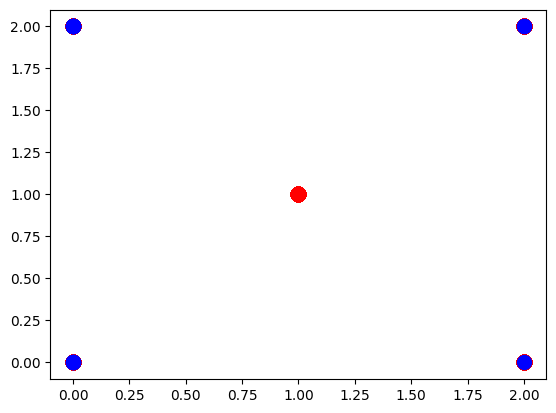

In [ ]:
plt.scatter(df['loan'][df['clusters']==0],df['housing'][df['clusters']==0], s=100,c='red',label='Cluster1')
plt.scatter(df['loan'][df['clusters']==1],df['housing'][df['clusters']==1], s=100,c='blue',label='Cluster2')


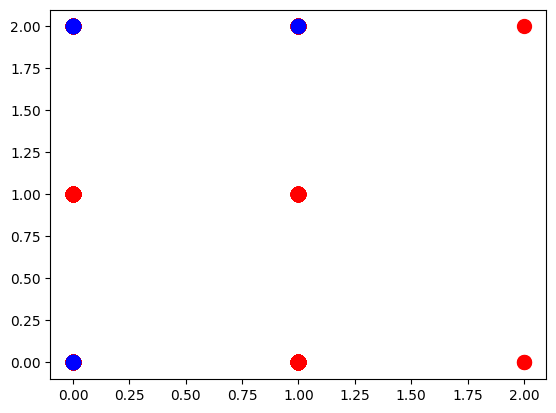

In [ ]:
plt.scatter(df['default'][df['clusters']==0],df['housing'][df['clusters']==0], s=100,c='red',label='Cluster1')
plt.scatter(df['default'][df['clusters']==1],df['housing'][df['clusters']==1], s=100,c='blue',label='Cluster2')


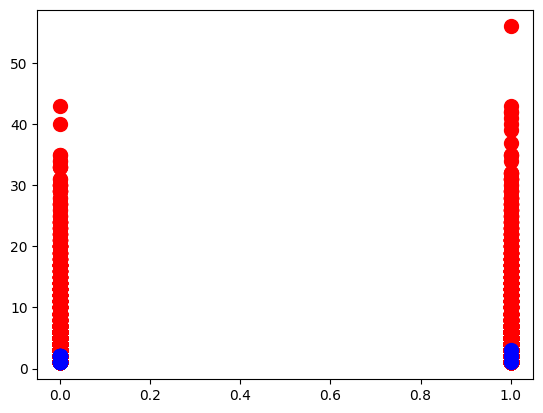

In [ ]:
plt.scatter(df['contact'][df['clusters']==0],df['campaign'][df['clusters']==0], s=100,c='red',label='Cluster1')
plt.scatter(df['contact'][df['clusters']==1],df['campaign'][df['clusters']==1], s=100,c='blue',label='Cluster2')


## Algorometive Algorithm

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=4)
ac.fit(df)
ac.labels_

AgglomerativeClustering(n_clusters=4)

array([1, 2, 2, ..., 3, 3, 2])

###KPrototypes

In [ ]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kprototypes import KPrototypes
data=pd.read_csv("/content/bankmarketing.csv")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.drop(['previous','pdays'],axis=1,inplace=True)

In [ ]:
data.head()

,age,job,default,housing,loan,contact,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,no,no,no,telephone,261,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,unknown,no,no,telephone,149,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,no,yes,no,telephone,226,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,no,no,no,telephone,151,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,no,no,yes,telephone,307,1,1.1,93.994,-36.4,4.857,5191.0,no


Converting pandas into numpy array

In [ ]:
df1=data.values
df1

array([[56, 'housemaid', 'no', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'unknown', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'no', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'no', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'no', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'no', ..., 1.028, 4963.6, 'no']], dtype=object)

In [ ]:
df1[:,8]=df1[:,8].astype(float)
df1[:,9]=df1[:,9].astype(float)
df1[:,10]=df1[:,10].astype(float)
df1[:,11]=df1[:,11].astype(float)
df1[:,12]=df1[:,12].astype(float)

In [ ]:
df1

array([[56, 'housemaid', 'no', ..., 4.857, 5191.0, 'no'],
       [57, 'services', 'unknown', ..., 4.857, 5191.0, 'no'],
       [37, 'services', 'no', ..., 4.857, 5191.0, 'no'],
       ...,
       [56, 'retired', 'no', ..., 1.028, 4963.6, 'no'],
       [44, 'technician', 'no', ..., 1.028, 4963.6, 'yes'],
       [74, 'retired', 'no', ..., 1.028, 4963.6, 'no']], dtype=object)

In [ ]:
kproto=KPrototypes(n_clusters=3,verbose=2,max_iter=20)
clusters=kproto.fit_predict(df1,categorical=[1,2,3,4,5,7,8,9,10,11,12,13])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 5273, ncost: 708477099.759997
Run: 1, iteration: 2/20, moves: 2279, ncost: 662072802.6684487
Run: 1, iteration: 3/20, moves: 1993, ncost: 640520158.2435712
Run: 1, iteration: 4/20, moves: 1458, ncost: 629666870.4523937
Run: 1, iteration: 5/20, moves: 947, ncost: 624092100.0085077
Run: 1, iteration: 6/20, moves: 599, ncost: 621710668.5906203
Run: 1, iteration: 7/20, moves: 428, ncost: 620533841.7590863
Run: 1, iteration: 8/20, moves: 289, ncost: 619996663.6468412
Run: 1, iteration: 9/20, moves: 244, ncost: 619628668.1638895
Run: 1, iteration: 10/20, moves: 141, ncost: 619438426.9819515
Run: 1, iteration: 11/20, moves: 123, ncost: 619319410.6593521
Run: 1, iteration: 12/20, moves: 89, ncost: 619257118.3073943
Run: 1, iteration: 13/20, moves: 64, ncost: 619230477.6106997
Run: 1, iteration: 14/20, moves: 

In [ ]:
print(kproto.cluster_centroids_)

[['39.984081471228' '143.96789928152396' 'admin.' 'no' 'yes' 'no'
  'cellular' '1' '1.4' '93.994' '-36.4' '4.857' '5228.1' 'no']
 ['39.72678571428571' '1156.9410714285714' 'admin.' 'no' 'yes' 'no'
  'cellular' '1' '1.4' '93.918' '-42.7' '4.963' '5228.1' 'yes']
 ['40.21088806458651' '471.9951996508837' 'admin.' 'no' 'yes' 'no'
  'cellular' '1' '1.4' '93.994' '-36.4' '4.857' '5228.1' 'no']]


In [ ]:
cluster_dist=[]
for i in clusters:
  cluster_dist.append(i)
       

In [ ]:
cluster_dist


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,


In [ ]:
data['cluster']=cluster_dist

In [ ]:
data.head()

,age,job,default,housing,loan,contact,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,no,no,no,telephone,261,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,unknown,no,no,telephone,149,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,no,yes,no,telephone,226,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,no,no,no,telephone,151,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,no,no,yes,telephone,307,1,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
data[data['cluster']==0].head(10)

,age,job,default,housing,loan,contact,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,no,no,no,telephone,261,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,unknown,no,no,telephone,149,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,no,yes,no,telephone,226,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,no,no,no,telephone,151,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,no,no,yes,telephone,307,1,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,unknown,no,no,telephone,198,1,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,no,no,no,telephone,139,1,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,unknown,no,no,telephone,217,1,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,no,yes,no,telephone,50,1,1.1,93.994,-36.4,4.857,5191.0,no,0
10,41,blue-collar,unknown,no,no,telephone,55,1,1.1,93.994,-36.4,4.857,5191.0,no,0


In [ ]:
data[data['cluster']==1].head(10)

,age,job,default,housing,loan,contact,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
37,52,technician,no,yes,no,telephone,1666,1,1.1,93.994,-36.4,4.857,5191.0,no,1
75,41,blue-collar,unknown,yes,no,telephone,1575,1,1.1,93.994,-36.4,4.857,5191.0,yes,1
83,49,entrepreneur,unknown,yes,no,telephone,1042,1,1.1,93.994,-36.4,4.857,5191.0,yes,1
88,49,technician,no,no,no,telephone,1467,1,1.1,93.994,-36.4,4.857,5191.0,yes,1
111,58,unemployed,unknown,no,no,telephone,849,2,1.1,93.994,-36.4,4.857,5191.0,no,1
164,39,services,unknown,no,no,telephone,2033,1,1.1,93.994,-36.4,4.857,5191.0,no,1
169,54,management,no,yes,no,telephone,843,2,1.1,93.994,-36.4,4.857,5191.0,no,1
199,43,blue-collar,no,yes,no,telephone,1077,1,1.1,93.994,-36.4,4.857,5191.0,no,1
276,34,services,no,no,no,telephone,962,1,1.1,93.994,-36.4,4.857,5191.0,no,1
286,39,housemaid,no,yes,no,telephone,935,3,1.1,93.994,-36.4,4.857,5191.0,yes,1


In [ ]:
data[data['cluster']==2].head(10)

,age,job,default,housing,loan,contact,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
8,24,technician,no,yes,no,telephone,380,1,1.1,93.994,-36.4,4.857,5191.0,no,2
16,35,blue-collar,no,yes,no,telephone,312,1,1.1,93.994,-36.4,4.857,5191.0,no,2
17,46,blue-collar,unknown,yes,yes,telephone,440,1,1.1,93.994,-36.4,4.857,5191.0,no,2
18,50,blue-collar,no,yes,yes,telephone,353,1,1.1,93.994,-36.4,4.857,5191.0,no,2
22,55,retired,no,yes,no,telephone,342,1,1.1,93.994,-36.4,4.857,5191.0,no,2
29,55,unknown,unknown,unknown,unknown,telephone,362,1,1.1,93.994,-36.4,4.857,5191.0,no,2
30,46,admin.,no,no,no,telephone,348,1,1.1,93.994,-36.4,4.857,5191.0,no,2
31,59,technician,no,yes,no,telephone,386,1,1.1,93.994,-36.4,4.857,5191.0,no,2
35,55,unknown,unknown,yes,no,telephone,336,1,1.1,93.994,-36.4,4.857,5191.0,no,2
36,34,services,no,no,no,telephone,365,1,1.1,93.994,-36.4,4.857,5191.0,no,2


As we can see the cluster is done based on Duration of call.